In [86]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Cargamos el dataset 
titanic = pd.read_csv("DATASET\\titanic.csv")

## Exploracion de datos 

In [88]:
## Visualizacion del dataframe
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [89]:
## Eliminamos las columnas que no nos aportan valor
columns_to_drop = ["Unnamed: 0", "fare", "embark_town",]
titanic.drop(columns_to_drop, axis = "columns", inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,NaN,no,True


In [90]:
## Renombrar el nombre de las columnas
titanic.columns = ["Survived", "Pclass", "Sex", "Age", "SiSp", "Parch", "Embarked" , "Class", "Who", "Adulte_male", "Deck", "Alive", "Alone"]
titanic.head()

,Survived,Pclass,Sex,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone
0,0,3,male,22.0,1,0,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,NaN,no,True


In [91]:
## Analizar el Shape del objeto 
print(titanic.shape)

(891, 13)


In [92]:
## Visualizamos los tipos de datos
titanic.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SiSp             int64
Parch            int64
Embarked        object
Class           object
Who             object
Adulte_male       bool
Deck            object
Alive           object
Alone             bool
dtype: object

In [93]:
## Cambiamos los tipos de datos 
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)

In [94]:
## Validamos el cambio
titanic.dtypes

Survived         int64
Pclass           int64
Age            float64
SiSp             int64
Parch            int64
Embarked        object
Class           object
Who             object
Adulte_male       bool
Deck            object
Alive           object
Alone             bool
Sex_male          bool
dtype: object

In [95]:
titanic.head()


,Survived,Pclass,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone,Sex_male
0,0,3,22.0,1,0,S,Third,man,True,NaN,no,False,True
1,1,1,38.0,1,0,C,First,woman,False,C,yes,False,False
2,1,3,26.0,0,0,S,Third,woman,False,NaN,yes,True,False
3,1,1,35.0,1,0,S,First,woman,False,C,yes,False,False
4,0,3,35.0,0,0,S,Third,man,True,NaN,no,True,True


In [96]:
## Renombramos la columna 
titanic.rename(columns={"Sex_male": "Sex"}, inplace=True)
titanic.head()

,Survived,Pclass,Age,SiSp,Parch,Embarked,Class,Who,Adulte_male,Deck,Alive,Alone,Sex
0,0,3,22.0,1,0,S,Third,man,True,NaN,no,False,True
1,1,1,38.0,1,0,C,First,woman,False,C,yes,False,False
2,1,3,26.0,0,0,S,Third,woman,False,NaN,yes,True,False
3,1,1,35.0,1,0,S,First,woman,False,C,yes,False,False
4,0,3,35.0,0,0,S,Third,man,True,NaN,no,True,True


In [97]:
titanic = titanic[["Survived", "Pclass", "Sex", "Age" , "SiSp", "Parch"]]
titanic.head()

,Survived,Pclass,Sex,Age,SiSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


### Entrenamiento de arbol de decision con Scikit - Learn

In [98]:
## Separamos en X e Y 
X = titanic.drop("Survived", axis = 1)
Y = titanic.Survived


In [99]:
# Importamos las librerias necesarias para la creacion del modelo 
from sklearn.model_selection import train_test_split

# Supongamos que X son tus datos y y son tus etiquetas - 30% de nuestros datos para el testeo y 70% para nuestro entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=00000)


In [100]:
# Arbol de decision 
from sklearn.tree import DecisionTreeClassifier

# Creacion del modelo 
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)


In [101]:
# Entrenamiento 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Entrenamiento del Modelo 

In [102]:
# Calculo de las predicciones Train y Test 
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


In [103]:
# Calculo de las metricas 
from sklearn.metrics import accuracy_score

#Calculamos accuracy train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculamos accuracy test 
test_accuracy = accuracy_score(y_test, y_test_pred)

print("El accuracy en train es: ", train_accuracy)
print("El accuracy en train es: ", test_accuracy)

El accuracy en train es:  0.7913322632423756
El accuracy en train es:  0.7873134328358209


C:\Users\abuen\AppData\Local\Temp\ipykernel_20368\3212644671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


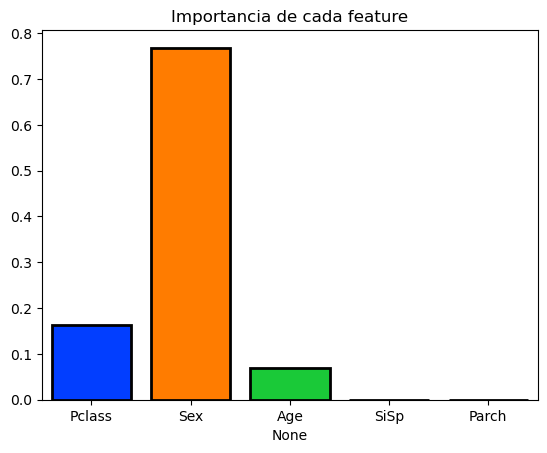

In [104]:
# Si obtenemos valores cercanos es algo positivo 
# Ahora verificamos el feature importances 

import seaborn as sns 

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

plt.title("Importancia de cada feature")
plt.show()